In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 50)


In [2]:
import os 
working_directory = os.getcwd()
print(working_directory)

/Users/neelrajwat


In [3]:
path = working_directory + '/Data/netflix_titles_2021.csv'
df = pd.read_csv(path)

In [4]:
df.shape

(8807, 12)

In [5]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df2 = df.dropna()

In [11]:
df2.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdom  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   
24                                              India  September 21, 2021   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
8   A talented batch of amateur bakers face off in...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...

In [12]:
df2.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
# Assign day, year, and month components to new columns using assign() method
df2 = df2.assign(
           date_added=pd.to_datetime(df2['date_added']),
           day_added=df2['date_added'].dt.day,
           year_added=df2['date_added'].dt.year,
           month_added=df2['date_added'].dt.month,
)

# Convert year_added and day_added columns to int using astype() method
df2 = df2.astype({'year_added': int, 'day_added': int})

AttributeError: Can only use .dt accessor with datetimelike values

In [14]:
df2.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdom  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   
24                                              India  September 21, 2021   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
8   A talented batch of amateur bakers face off in...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...

In [15]:
df2.shape

(5332, 12)

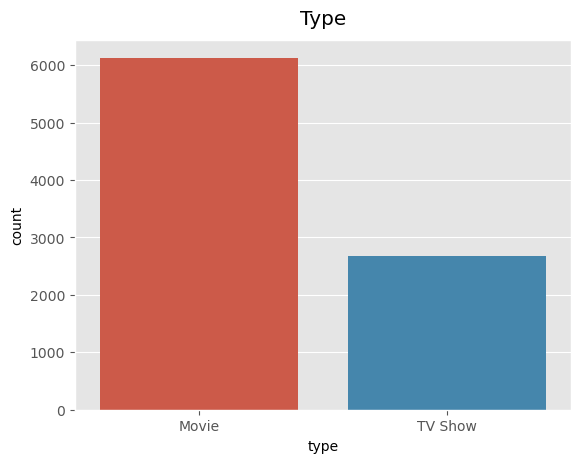

In [16]:
sns.countplot(x= 'type', data = df)
plt.title('Type', y= 1.02)
plt.show()

Text(0.5, 1.0, 'Rating')

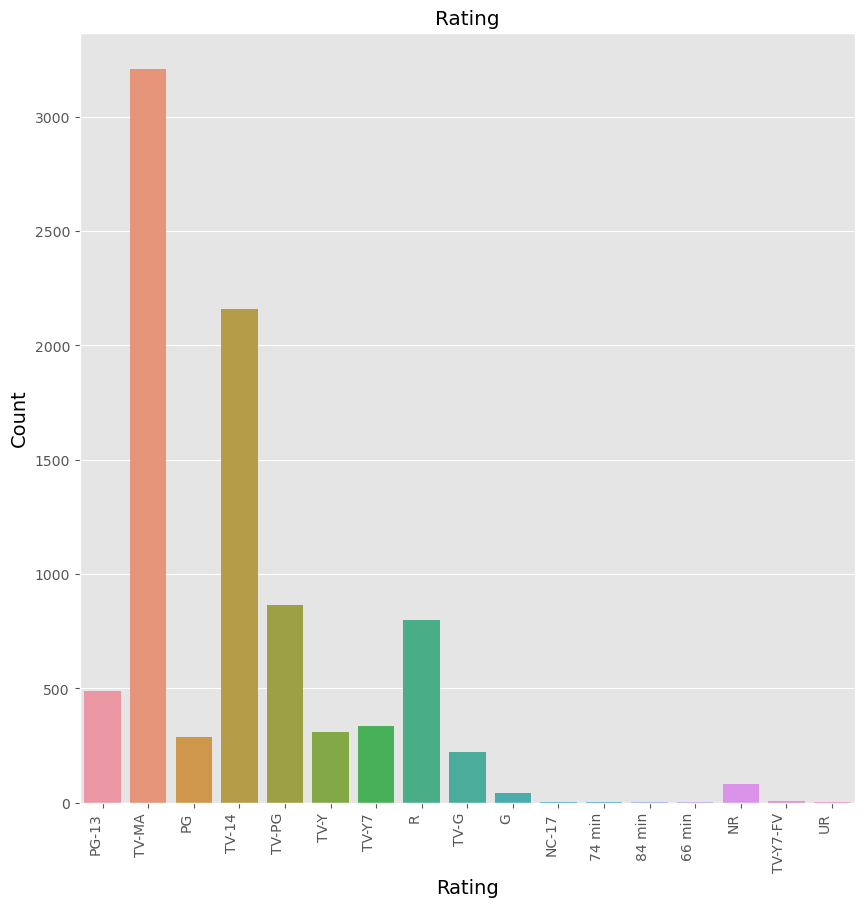

In [17]:
sns.countplot(x= 'rating', data = df)
sns.countplot(x= 'rating', data = df).set_xticklabels(sns.countplot(x='rating', data = df).get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Rating')

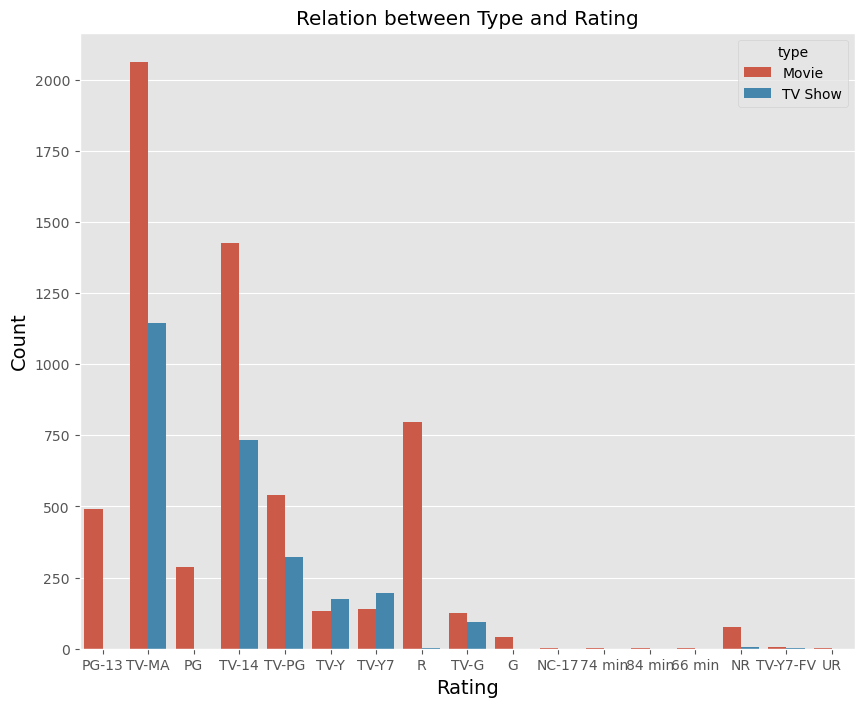

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Count', fontsize=14)
plt.show()

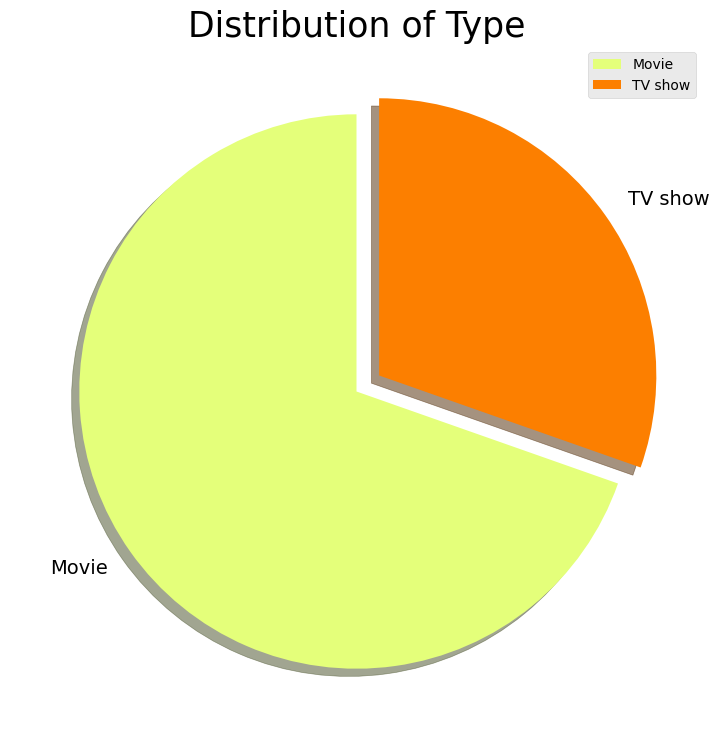

In [19]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90, textprops={'fontsize': 14})
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

In [20]:
from wordcloud import WordCloud

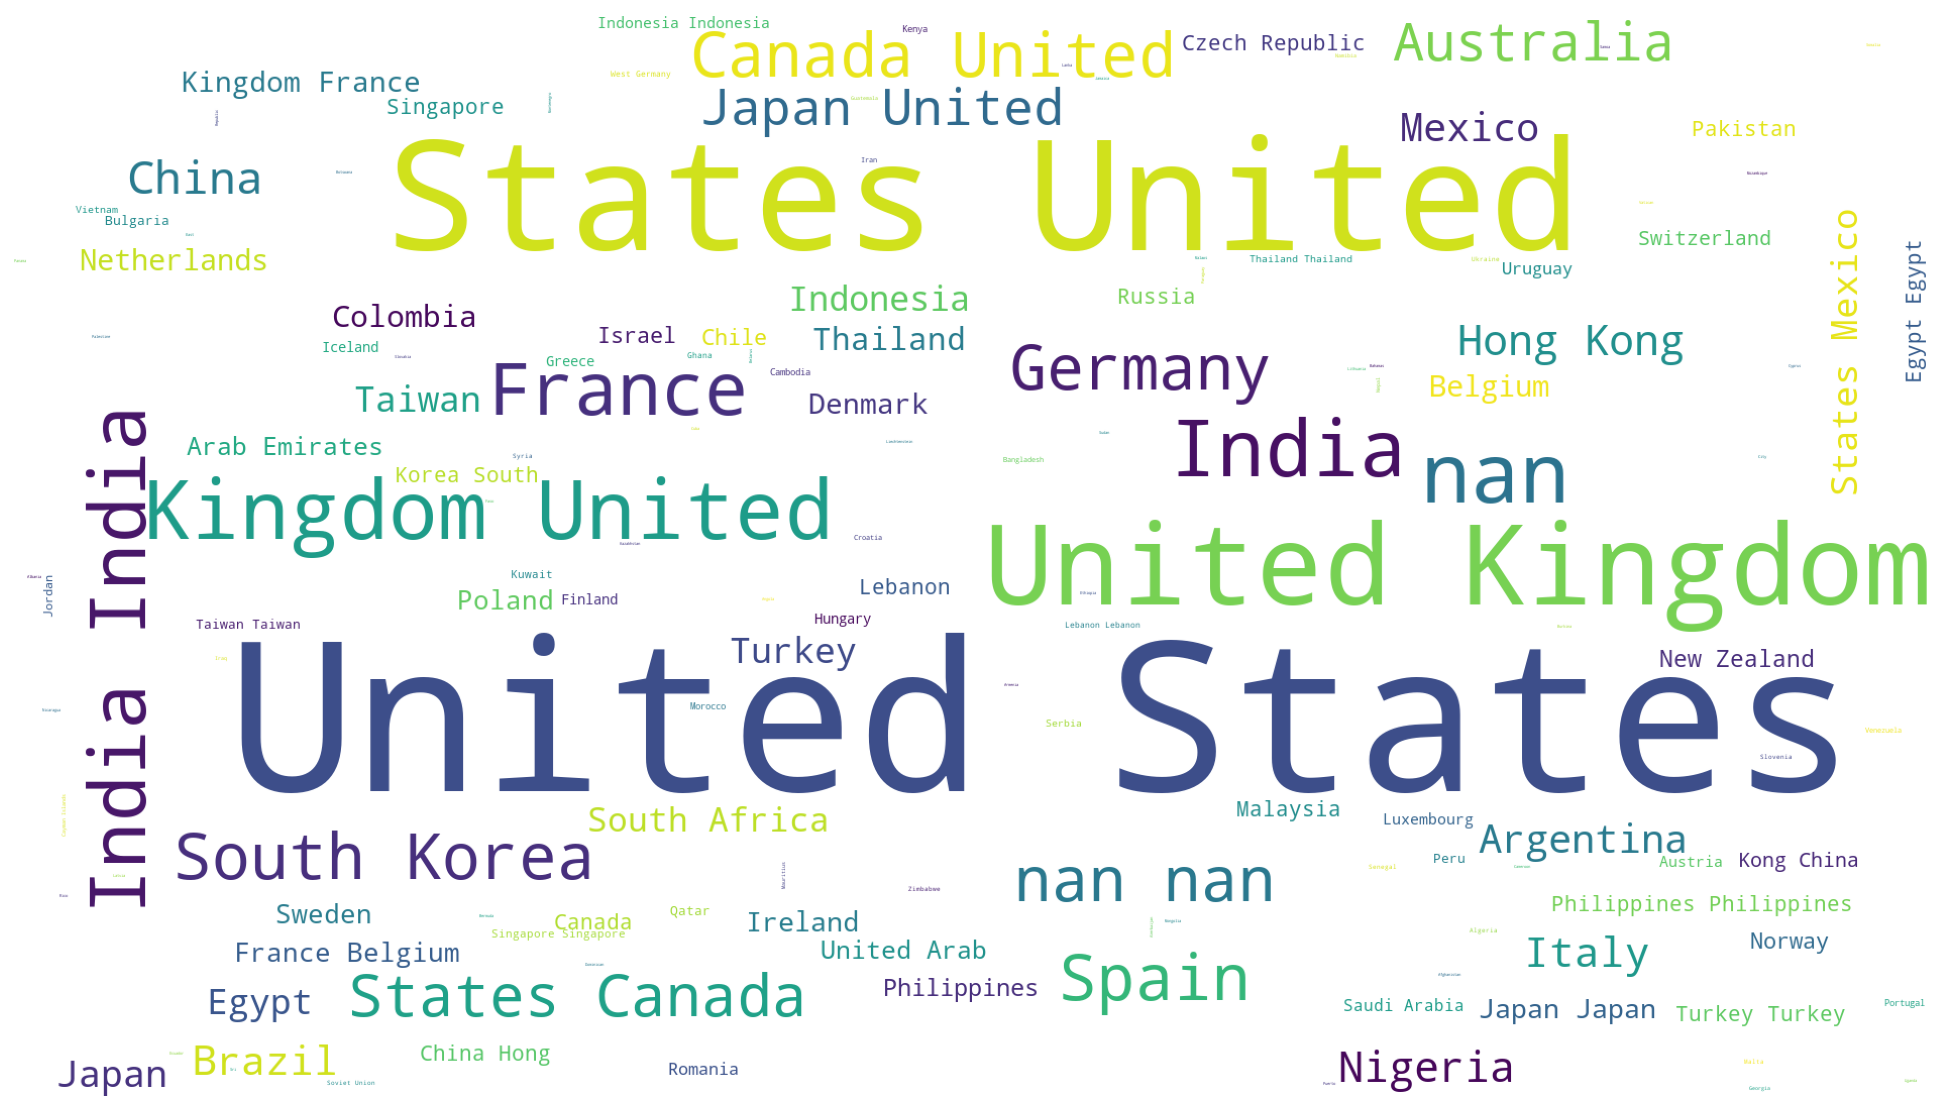

In [21]:
plt.subplots(figsize=(25,15))

# Convert country values to strings
country_strings = df['country'].astype(str)

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(country_strings))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

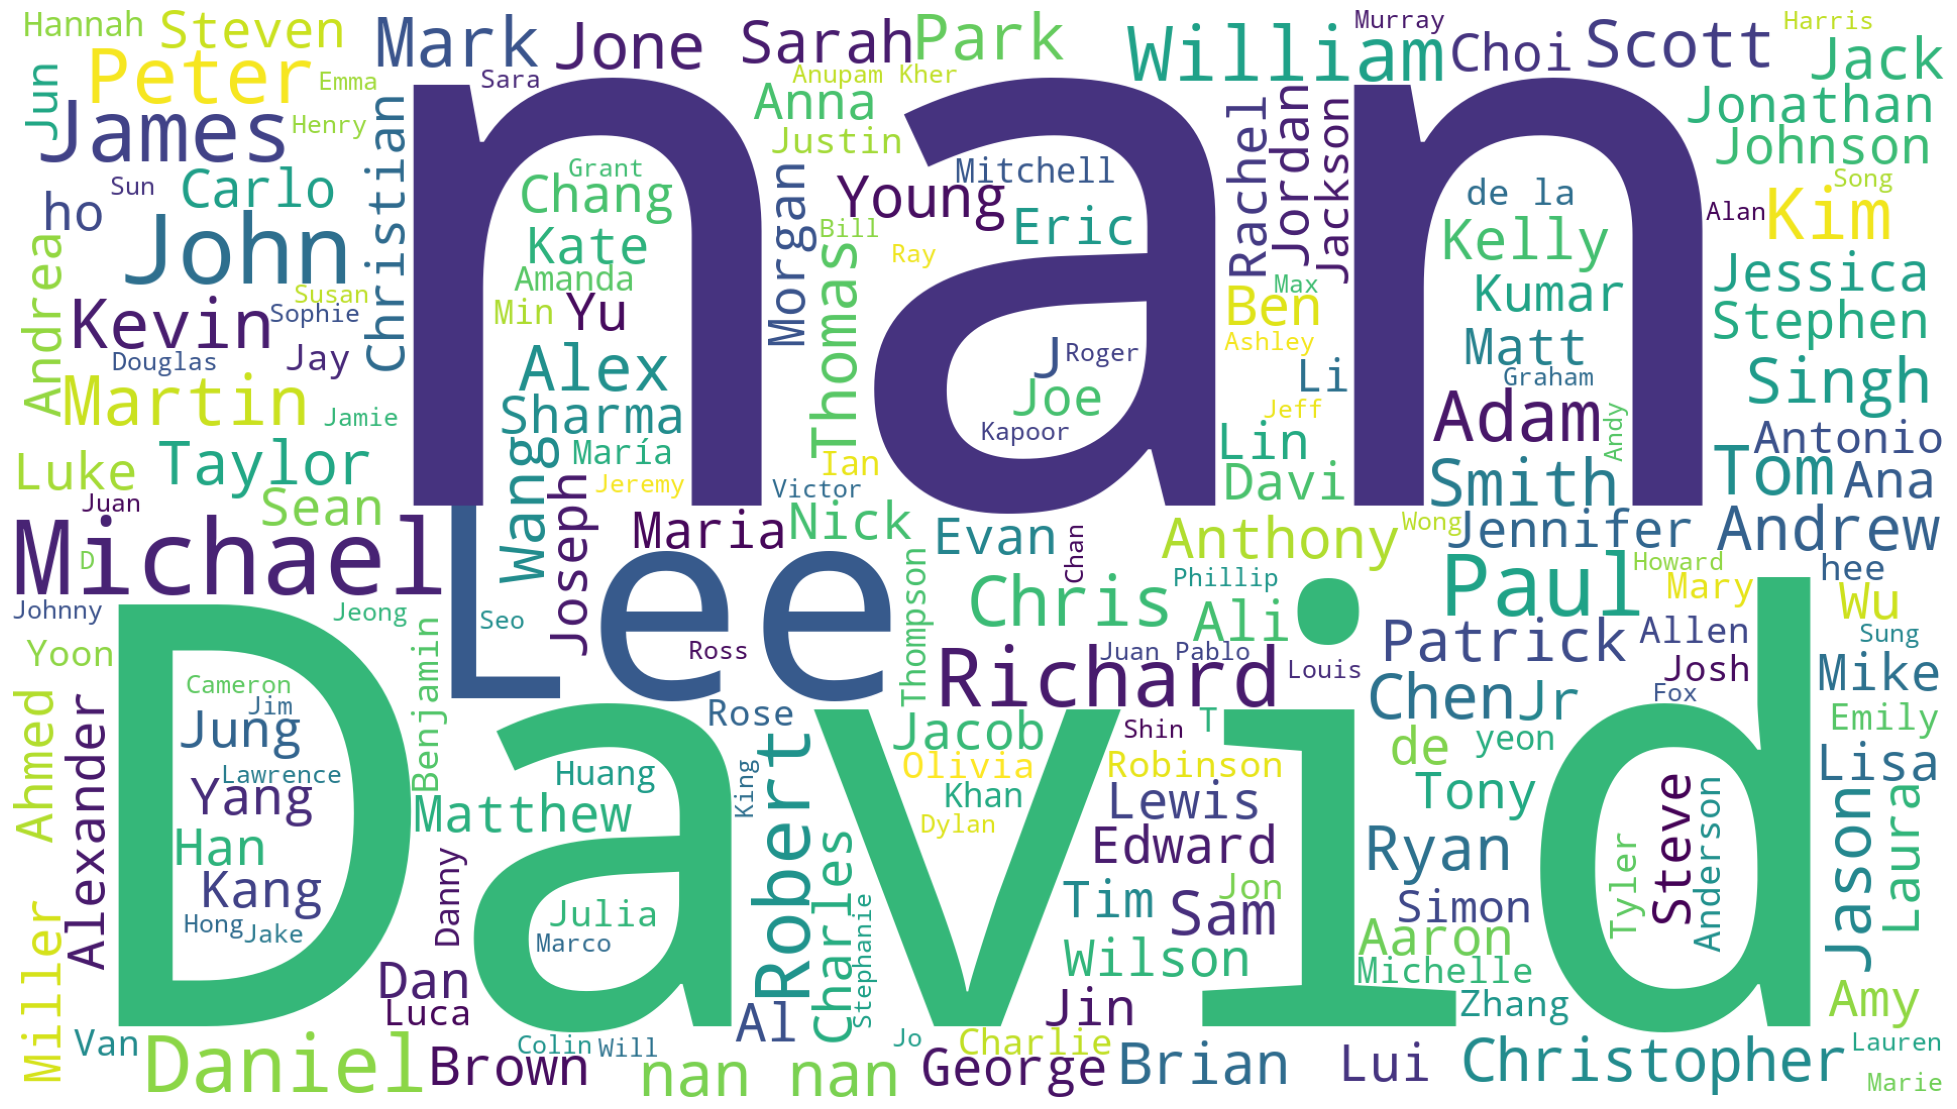

In [22]:
plt.subplots(figsize=(25,15))

# Convert country values to strings
cast_strings = df['cast'].astype(str)

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(cast_strings))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

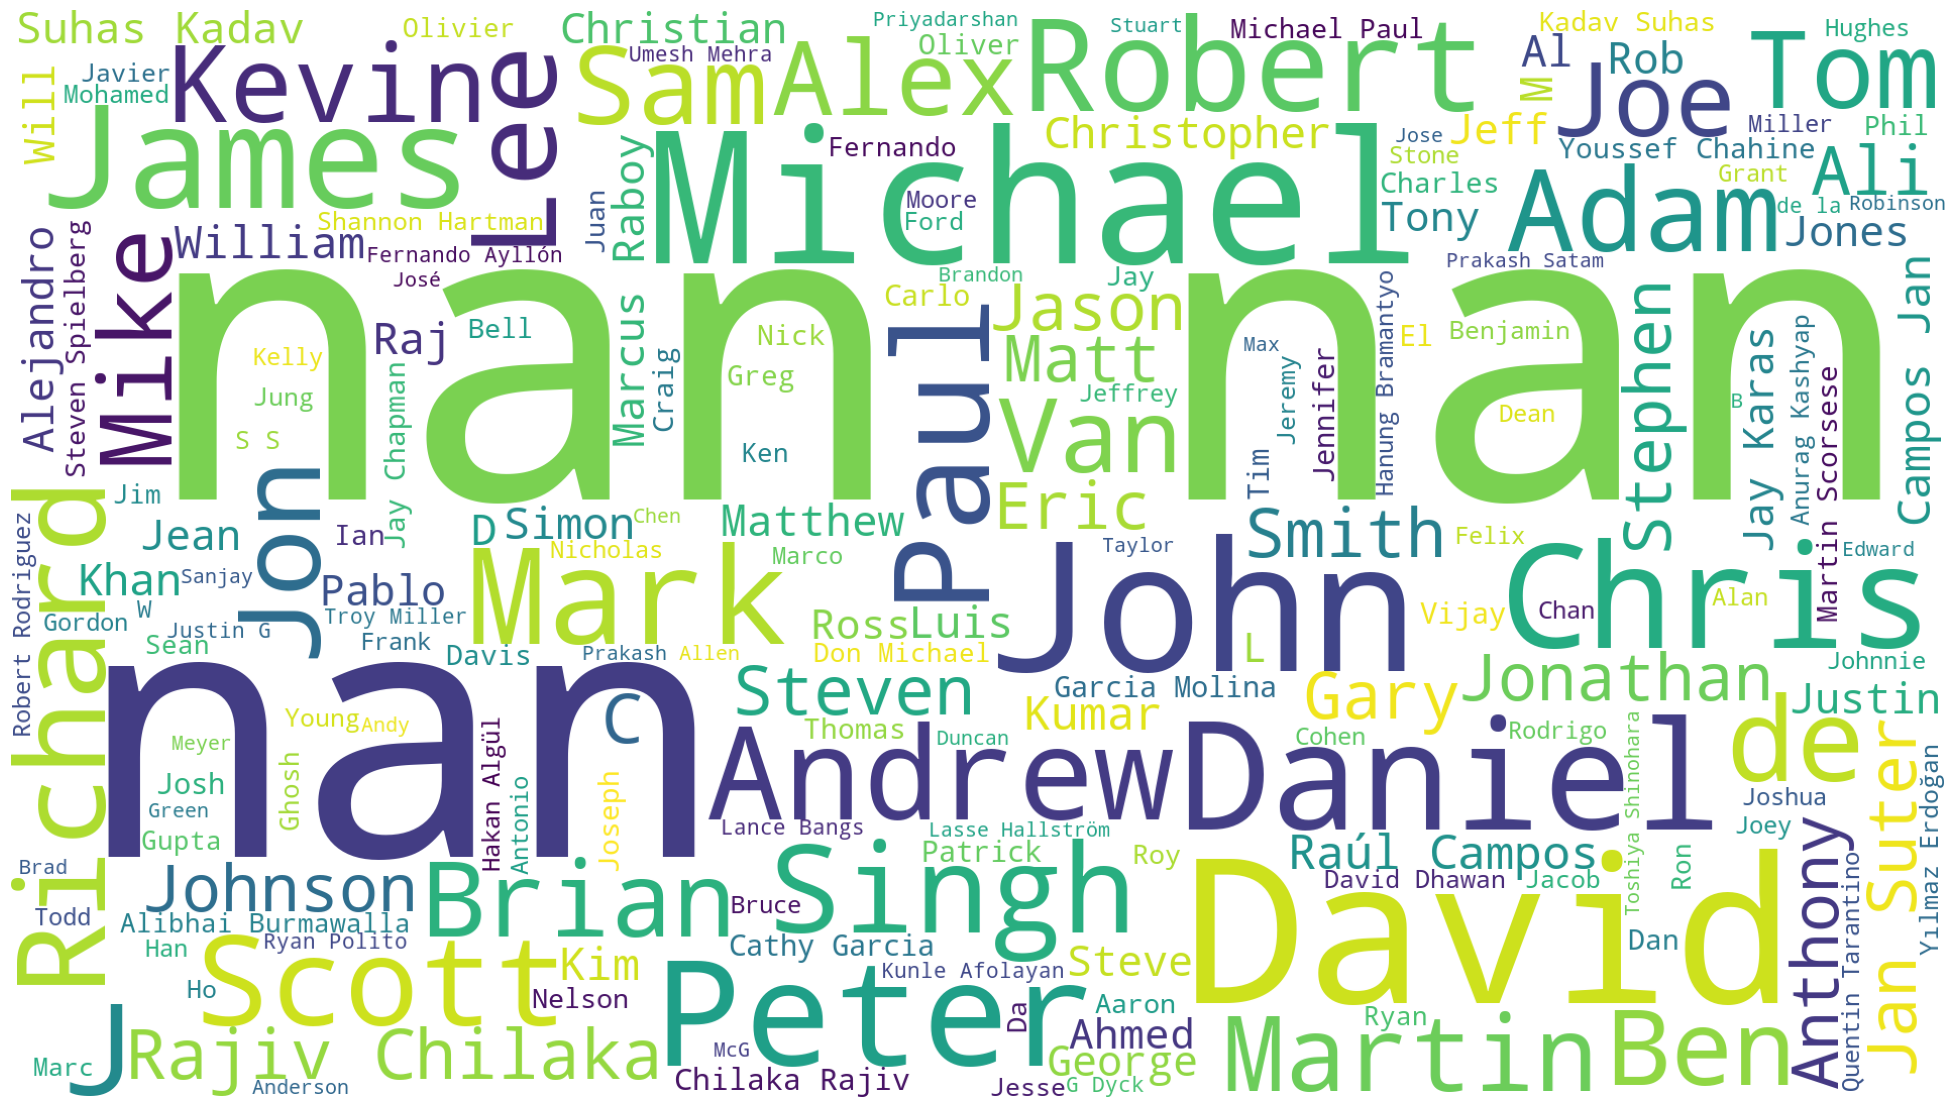

In [23]:
plt.subplots(figsize=(25,15))

# Convert country values to strings
director_strings = df['director'].astype(str)

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(director_strings))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

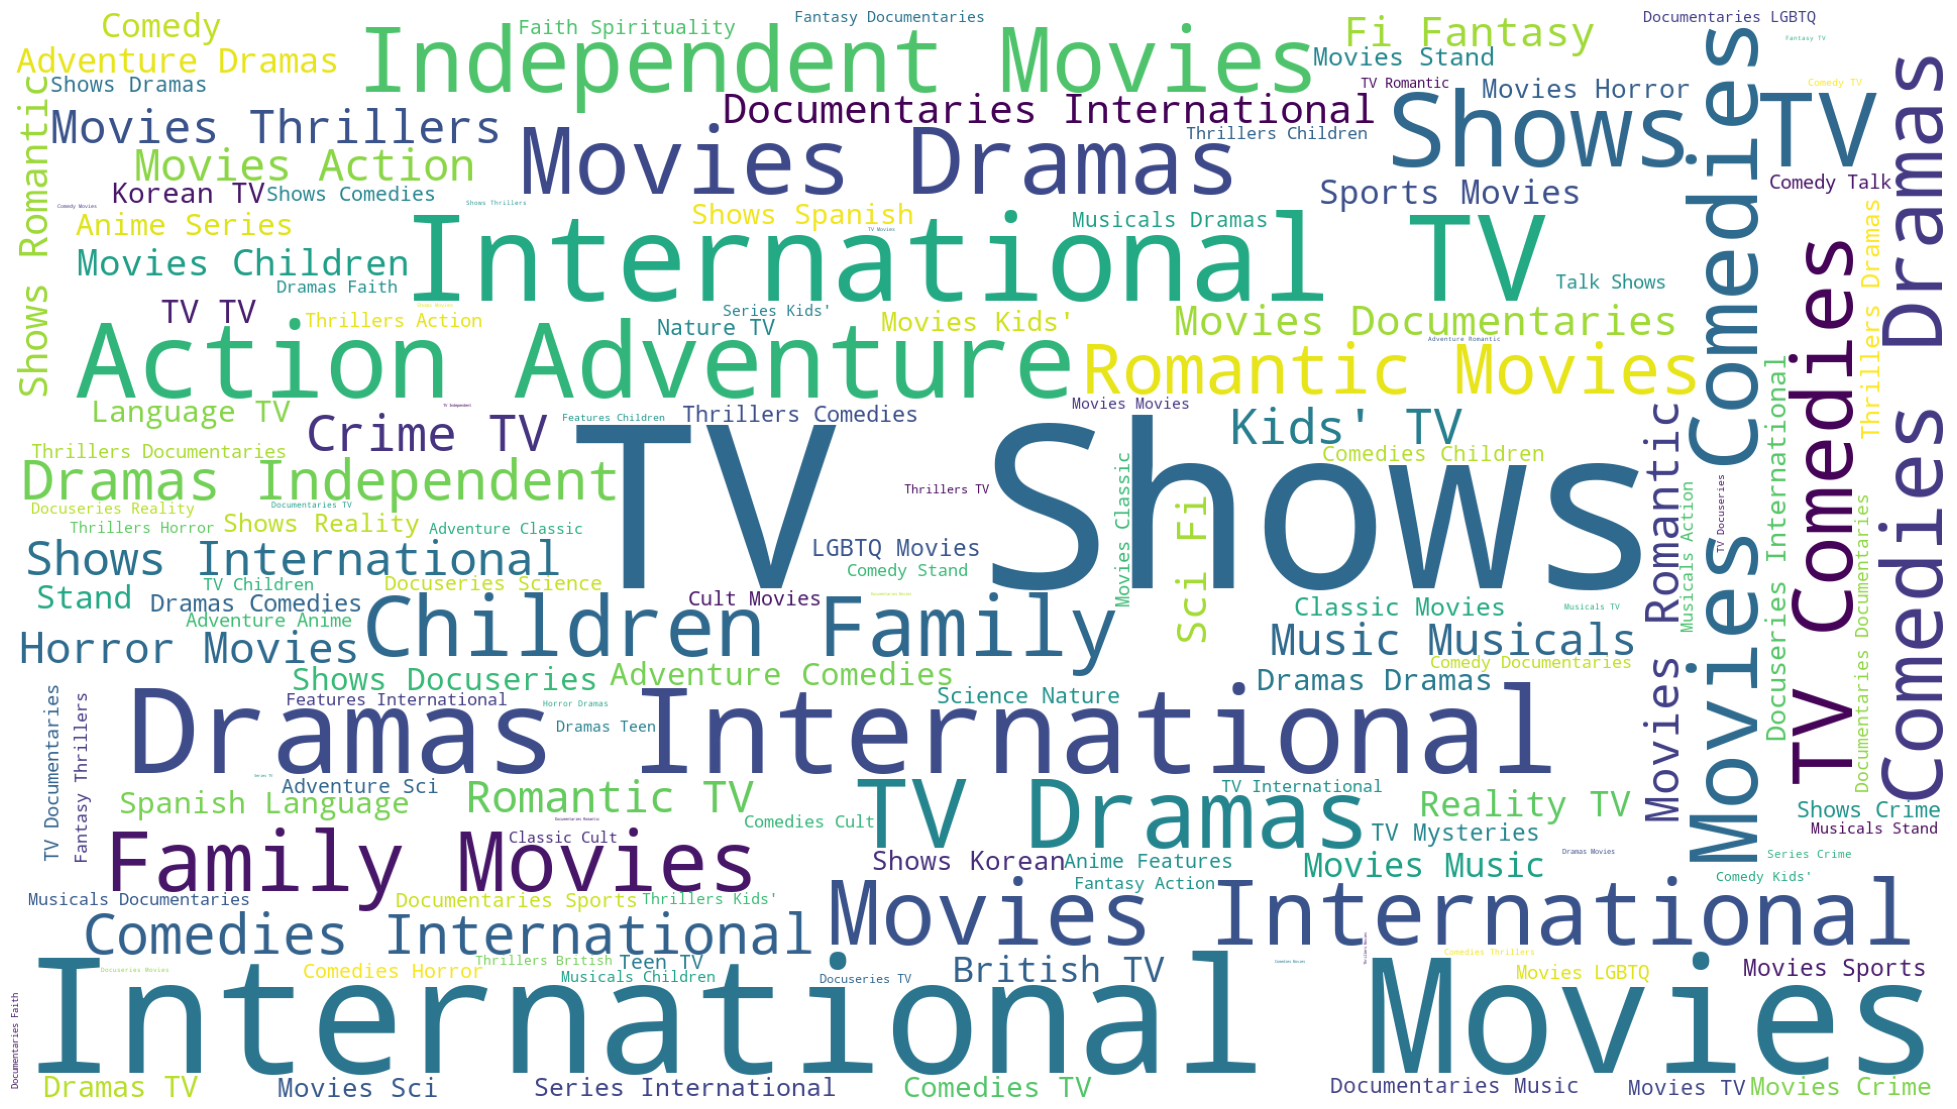

In [24]:
plt.subplots(figsize=(25,15))

# Convert country values to strings
category_strings = df['listed_in'].astype(str)

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(category_strings))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()